In [19]:
from collections import Counter
import warnings

import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler

from helpers import model_report_from

In [20]:
warnings.filterwarnings('ignore')

In [21]:
ft_train = np.load("./processed_data/features_train.npy")
ft_test = np.load("./processed_data/features_test.npy")
lbl_train = np.load("./processed_data/labels_train.npy")
lbl_test = np.load("./processed_data/labels_test.npy")

# Multi-Layer Perceptron Neural Network

## Balancing data

In [22]:
# no balance parameter, so will have to do "by hand"
ros = RandomUnderSampler()
ft_train_res, lbl_train_res = ros.fit_resample(ft_train, lbl_train)

In [23]:
Counter(lbl_train)

Counter({0: 3889, 1: 199})

In [24]:
Counter(lbl_train_res)

Counter({0: 199, 1: 199})

## Hyperparameter tuning

In [25]:
# try out solvers 
param = {
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'hidden_layer_sizes' : [(100,), (50, 50, 25,), (75, 50, 50, 25,), (100, 100, 50,)],
}

In [26]:
clf = GridSearchCV(MLPClassifier(), param, scoring='recall', refit=True, cv=2)

In [27]:
clf.fit(ft_train_res, lbl_train_res)
clf.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (100,)}

## Final MLP Classifier

In [28]:
mlp = MLPClassifier(activation=clf.best_params_['activation'], hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'])
# mlp = MLPClassifier(activation=clf.best_params_['activation'], hidden_layer_sizes=(50, 50, 25,))
mlp.fit(ft_train_res, lbl_train_res)

MLPClassifier()

accuracy = 0.7211350293542074
precision = 0.12933753943217666
recall = 0.82
f1 = 0.223433242506812
ROC AUC score = 0.7680246913580246


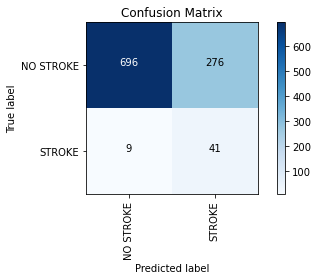

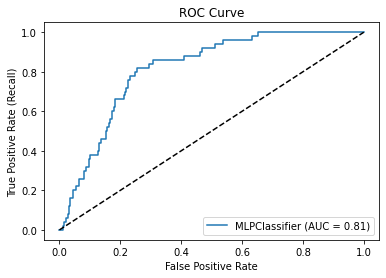

In [29]:
model_report_from(mlp, ft_test, lbl_test, [])